In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Import datetime to be able to calculate the last 12 months of information
#Source:https://www.geeksforgeeks.org/python-datetime-timedelta-function/
from datetime import datetime, timedelta

In [10]:
# Find the most recent date in the data set.
#Source: Xpert learning assistant
max_date = session.query(func.max(Measurement.date)).scalar()
print(max_date)

2017-08-23


[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

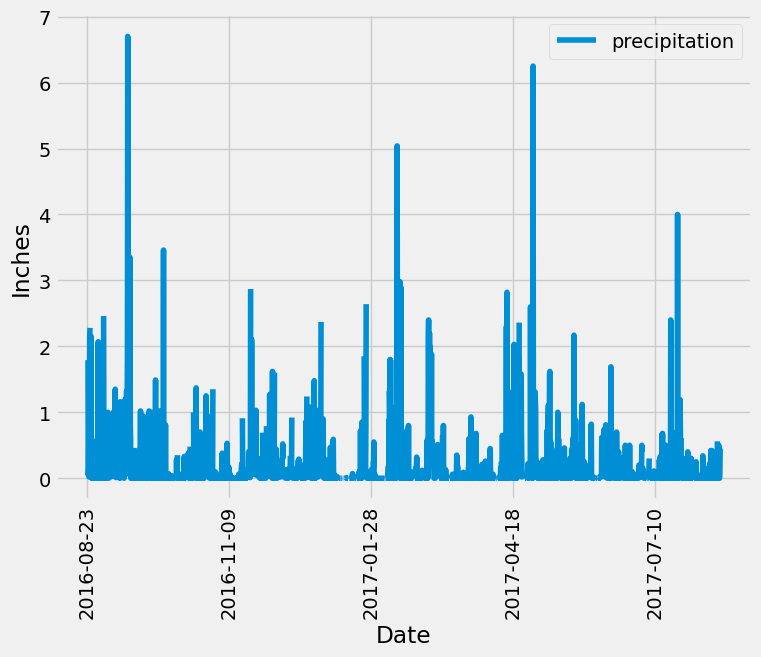

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#Note: 2016 was a leap year so instead of 365days, the data will be collected from 366 days.
last_year_date = datetime.strptime(max_date, '%Y-%m-%d') - timedelta(days=366)


# Perform a query to retrieve the data and precipitation scores
last_12m_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=last_year_date).all()
print(last_12m_data)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_12m_df = pd.DataFrame(last_12m_data, columns=['date','precipitation'])
last_12m_df.set_index('date', inplace=True)
# Sort the dataframe by date
last_12m_df = last_12m_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data in a barchart
last_12m_df.plot(xlabel="Date", ylabel="Inches", figsize=(8,6), rot=90)
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_12m_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
print(total_stations)

9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
ave_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

In [16]:
# Alternate query, using the most active station id from the previous query, calculate the lowest, highest, and average temperature. (THis one will be used in app.py file)
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Query to store the data for the past year
most_active_station_data = session.query(Measurement.tobs).\
      filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date>=last_year_date).all()

# Query to convert the above results into a Dataframe
most_active_station_df = pd.DataFrame(most_active_station_data, columns=["tobs"])
most_active_station_df


,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, 0, 'Temperature')

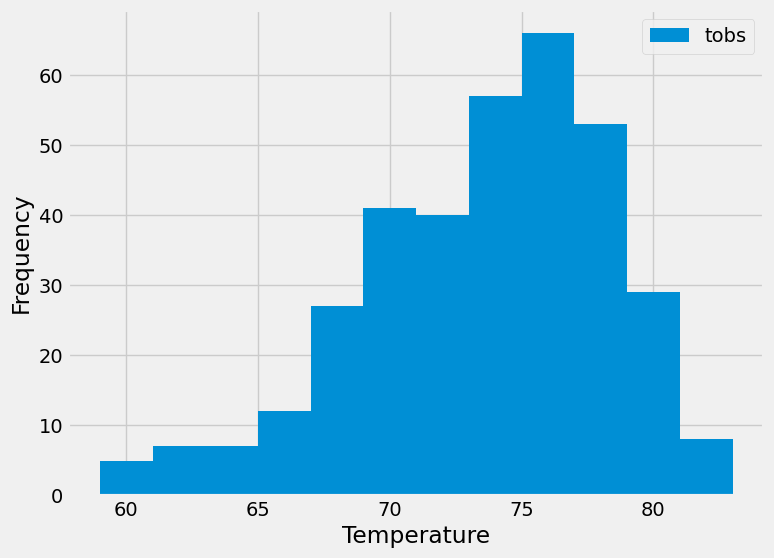

In [18]:
#Query to plot a histogram of the station id USC00519281 results.
most_active_station_df.plot.hist(xlabel="Temperature", ylabel="Frequency", figsize=(8,6), bins=12)
plt.xlabel("Temperature")


# Close Session

In [19]:
# Close Session
session.close()